In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
t = np.array([200.0, 200.0, 200.0, 240.0, 400.0, 150.0, 483.4, 233.4, 333.4, 233.4, 716.8, 250.0, 
              316.7, 316.7, 333.4, 733.5, 866.84, 400.1, 266.7, 383.4, 500.1, 250.0, 216.7, 133.36, 
              400.1, 400.1, 566.8, 766.8, 416.8, 416.8, 183.37, 616.8, 400.1, 466.8, 333.4, 383.4, 
              416.75, 483.43, 300.1, 200.0, 416.8, 333.4, 433.4, 133.4, 333.4])

z = np.array([7, 7, 8, 7, 25, 23, 30, 18, 24, 20, 37, 22, 13, 27, 25, 35, 30, 31, 17, 20, 25, 
              13, 15, 12, 22, 30, 17, 30, 23, 23, 15, 20, 20, 27, 23, 24, 26, 27, 25, 15, 22, 
              30, 25, 10, 28])

print(len(t), len(z))  # Confirming both arrays have the same length

45 45


In [18]:
import math

# uncertainties
sigma_t = 1000 / 60  # 16.67 ms
sigma_z = 2.5  # mm


velocities = z / t  
mean_velocity = np.mean(velocities)

# error propagation for velocity
sigma_velocity = np.sqrt(np.sum((velocities**2) * ((sigma_z / z)**2 + (sigma_t / t)**2))) / len(t)

mean_velocity_cm_s = mean_velocity * 100
sigma_velocity_cm_s = sigma_velocity * 100

# Print velocity
print(f"Velocity: ({mean_velocity_cm_s:.2f} ± {sigma_velocity_cm_s:.2f}) cm/s")

# constants for delta calculation
mu = 1.8e-3  # Pa·s 
rho = 1000   # kg/m³ 
g = 9.81     # m/s²

# Function to calculate delta
def calculate_delta(u):
    return math.sqrt((3 * mu * u) / (rho * g))

delta_result = calculate_delta(mean_velocity)

# error propagation for delta
sigma_delta = (0.5 * delta_result * (sigma_velocity / mean_velocity))

delta_microns = delta_result * 1e6
sigma_delta_microns = sigma_delta * 1e6

print(f"Delta: ({delta_result:.6e} ± {sigma_delta:.6e}) m")

print(f"Delta: ({delta_microns:.2f} ± {sigma_delta_microns:.2f}) µm")


Velocity: (6.29 ± 0.15) cm/s
Delta: (1.860155e-04 ± 2.248400e-06) m
Delta: (186.02 ± 2.25) µm


In [19]:
# Compute median velocity
median_velocity = np.median(velocities)

delta_median_microns = delta_median * 1e6
sigma_delta_median_microns = sigma_delta_median * 1e6


print(f"Delta (Median): {delta_median_microns:.2f} µm")


Delta (Median): 184.83 µm


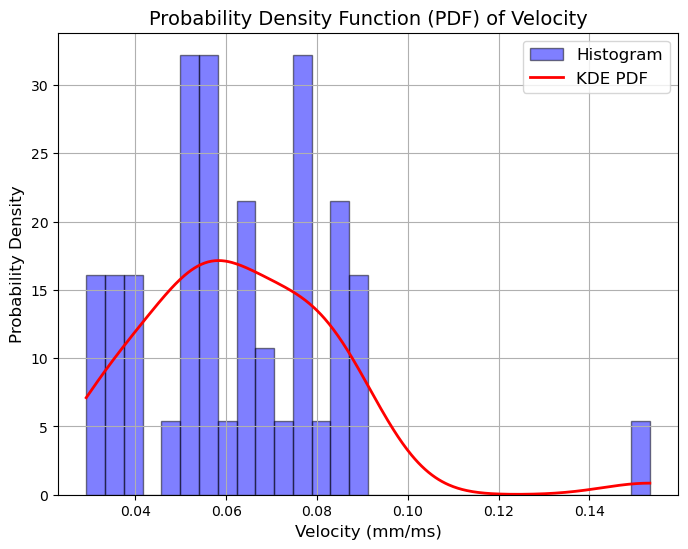

In [ ]:



# Fit a kernel density estimate (KDE) to the velocities
kde = stats.gaussian_kde(velocities, bw_method='scott')

# Generate values for the x-axis
vel_values = np.linspace(min(velocities), max(velocities), 500)

pdf_values = kde(vel_values)


plt.figure(figsize=(8, 6))
plt.hist(velocities, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black', label='Histogram')  # Increased bins
plt.plot(vel_values, pdf_values, color='red', linewidth=2, label='KDE PDF')


plt.xlabel('Velocity (mm/ms)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Probability Density Function (PDF) of Velocity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)


plt.show()
